## Import TensorFlow and other libraries

In [209]:
import psutil
psutil.virtual_memory()



svmem(total=67159506944, available=23530143744, percent=65.0, used=42752630784, free=13965504512, active=4839555072, inactive=42461466624, buffers=5124096, cached=10436247552, shared=188702720, slab=3768426496)

In [1]:
import os
from sklearn.decomposition import PCA
import matplotlib.image as mpimg

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randrange
from PIL import Image
import random
import matplotlib.animation as animation


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras import initializers

2023-07-04 11:47:22.020049: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display
import keras_tuner as kt
from tensorflow.keras import backend as K
import matplotlib.animation as animation

In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
tf.config.set_visible_devices([], 'GPU')

2023-07-04 11:47:23.670942: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-04 11:47:23.672535: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-04 11:47:23.710315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:9e:00.0 name: Quadro P400 computeCapability: 6.1
coreClock: 1.2525GHz coreCount: 2 deviceMemorySize: 1.94GiB deviceMemoryBandwidth: 29.88GiB/s
2023-07-04 11:47:23.710381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-04 11:47:23.713998: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-04 11:47:23.714104: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-07-04 

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [26]:
#Generation de la base de données et concaténation.

nom_fichier="circular_motion"
n=1000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,indice_train):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        prediction_train.append(Bdd_train[len(Bdd_train)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    prediction_train.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")
    prediction_train.append(np.concatenate((image1,image2),axis=1))

print("train fait")
  
k=0

for i in range(indice_train,Nombre_fichiers):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_test.append(np.concatenate((image1,image2),axis=1))
        prediction_test.append(Bdd_test[len(Bdd_test)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    prediction_test.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")
    prediction_test.append(np.concatenate((image1,image2),axis=1))

print("test fait")     
k=0





train fait
test fait


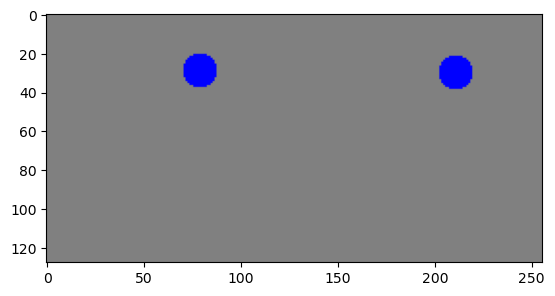

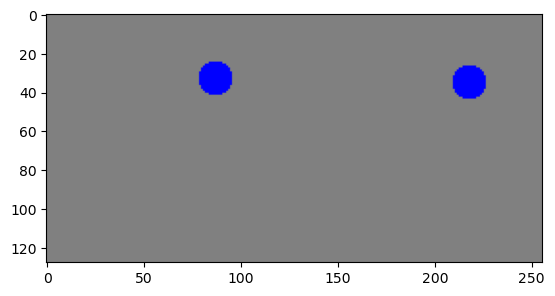

1.0


In [27]:
#visualisation prédicition

plt.imshow(Bdd_test[2])
plt.show()
plt.close()
plt.imshow(prediction_test[2])
plt.show()
plt.close()
print(np.max(Bdd_test[2]))

In [28]:
Bdd_train=np.array(Bdd_train)
Bdd_test=np.array(Bdd_test)
prediction_train=np.array(prediction_train)
prediction_test=np.array(prediction_test)


## Encoder Decoder



In [10]:
#défintion de fonction pour construire le modèle
def deconv_sigmoid(outch,kernel_size,stride=1,padding='same'):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  activation='sigmoid', padding='same',strides=stride),
    
    ])
    return convlayer

def deconv_relu(outch,kernel_size,stride=1,padding=1):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  padding='same',strides=stride),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
    return convlayer



In [11]:




#CONSTRUCTION DU MODELE DE DÉCODAGE
deconv_8 = deconv_relu(64,(3,4),stride=(1,2))
deconv_7 = deconv_relu(64,4,stride=2)
deconv_6 = deconv_relu(64,4,stride=2)
deconv_5 = deconv_relu(32,4,stride=2)
deconv_4 = deconv_relu(32,4,stride=2)
deconv_3 = deconv_relu(32,4,stride=2)
deconv_2 = deconv_relu(16,4,stride=2)
deconv_1 = deconv_sigmoid(3,4,stride=2)

predict_8 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_7 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_6 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_5 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_4 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_3 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_2 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')

up_sample_8 = tf.keras.Sequential([      
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 4), activation='sigmoid', padding='same',strides=(1,2),use_bias=False),         
    ])

up_sample_7 =tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_6 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_5 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_4 = tf.keras.Sequential([        
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_3 = tf.keras.Sequential([         
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_2 = tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])



def minigooglenet_functional(width, height, depth, classes):
    inputShape=(height,width,depth)
    chanDim=-1
    inputs=tf.keras.layers.Input(shape=inputShape)

    deconv8_out = deconv_8(inputs)
    predict_8_out = up_sample_8(predict_8(inputs))
    x = tf.keras.layers.Concatenate(axis=3)([deconv8_out, predict_8_out])

    deconv7_out = deconv_7(x)
    predict_7_out = up_sample_7(predict_7(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv7_out, predict_7_out])


    deconv6_out = deconv_6(x)
    predict_6_out = up_sample_6(predict_6(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv6_out, predict_6_out])

    deconv5_out = deconv_5(x)
    predict_5_out = up_sample_5(predict_5(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv5_out, predict_5_out])
    
    deconv4_out = deconv_4(x)
    predict_4_out = up_sample_4(predict_4(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv4_out, predict_4_out])
    
    deconv3_out = deconv_3(x)
    predict_3_out = up_sample_6(predict_3(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv3_out, predict_3_out])
    
    deconv2_out = deconv_2(x)
    predict_2_out = up_sample_2(predict_2(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv2_out, predict_2_out]) 
    
    
    x = deconv_1(x)
    


    model=Model(inputs,x,name="Test")
    return model



2023-07-04 11:47:39.469774: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 11:47:39.473223: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-04 11:47:39.473290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-04 11:47:39.473310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


class vae 1

In [12]:
#classe pour l'echantillonage (z en fonction de mean et var)
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

   

class VAE beta

In [13]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [14]:
#Classe pour constuire le VAE (loss et cie)
beta=0.5
class VAE(tf.keras.Model):
    '''
    A VAE model, built from given encoder and decoder
    '''

    version = '1.4'

    def __init__(self, encoder=None, decoder=None, loss_weights=[1,1], **kwargs):
        '''
        VAE instantiation with encoder, decoder and r_loss_factor
        args :
            encoder : Encoder model
            decoder : Decoder model
            loss_weights : Weight of the loss functions: reconstruction_loss and kl_loss
            r_loss_factor : Proportion of reconstruction loss for global loss (0.3)
        return:
            None
        '''
        super(VAE, self).__init__(**kwargs)
        self.encoder      = encoder
        self.decoder      = decoder
        self.loss_weights = loss_weights
        print(f'Fidle VAE is ready :-)  loss_weights={list(self.loss_weights)}')
       
        
    def call(self, inputs):
        '''
        Model forward pass, when we use our model
        args:
            inputs : Model inputs
        return:
            output : Output of the model 
        '''
        z_mean, z_log_var, z = self.encoder(inputs)
        output               = self.decoder(z)
        return output
                
        
    def train_step(self, input): 
        input0,input1 = input
        k1,k2 = self.loss_weights

        with tf.GradientTape() as tape:

            z_mean,z_log_var,z=self.encoder(input0,training=True) 
            reconstruction = self(input0,training=True)
            input32       = tf.cast(input1,dtype=tf.float32)
        
            reconstruction_loss  = k1 * loss_fn(input32,reconstruction)
            kl_loss=0

            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = -tf.reduce_mean(kl_loss) * k2

            total_loss = reconstruction_loss + kl_loss
            #total_loss = reconstruction_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        return {
            "loss":     total_loss,
            "r_loss":   reconstruction_loss,
            "kl_loss":  kl_loss,
        }
    
    
    
    def predict(self,inputs):
        '''Our predict function...'''
        z_mean, z_var, z  = self.encoder.predict(inputs)
        outputs           = self.decoder.predict(z)
        return outputs

        
    def save(self,filename):
        '''Save model in 2 part'''
        filename, extension = os.path.splitext(filename)
        self.encoder.save(f'{filename}-encoder.h5')
        self.decoder.save(f'{filename}-decoder.h5')

    
    def reload(self,filename):
        '''Reload a 2 part saved model.'''
        filename, extension = os.path.splitext(filename)
        self.encoder = tf.keras.models.load_model(f'{filename}-encoder.h5', custom_objects={'Sampling': Sampling},compile=False)
        self.decoder = tf.keras.models.load_model(f'{filename}-decoder.h5',compile=False)
        print('Reloaded.')
                
        
    @classmethod
    def about(cls):
        '''Basic whoami method'''
        display(Markdown('<br>**FIDLE 2021 - VAE**'))
        print('Version              :', cls.version)
        print('TensorFlow version   :', tf.__version__)
        print('Keras version        :', tf.keras.__version__)

class SamplingLayer(tf.keras.layers.Layer):
    '''A custom layer that receive (z_mean, z_var) and sample a z vector'''

    def call(self, inputs):
        
        z_mean, z_log_var = inputs
        
        batch_size = tf.shape(z_mean)[0]
        latent_dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch_size, latent_dim))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        
        return z


log_dir = "logs/" 

structure

In [15]:


latent_dim =64
p_x=128
p_y=128


encoder_inputs=tf.keras.layers.Input(shape=(p_x, 2*p_y, 3))
x=tf.keras.layers.Conv2D(16, (4, 4), padding='same', strides=2)(encoder_inputs)
layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(16, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)

x=tf.keras.layers.Conv2D(64, (3, 4), padding='same', strides=(1,2))(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)

x=layers.Flatten(name="split")(x)
z_m    = layers.Dense(latent_dim, name="z_m")(x)
z_l = layers.Dense(latent_dim, name="z_l")(x)

z         = Sampling()([z_m, z_l])

encoder = tf.keras.Model(encoder_inputs, [z_m,z_l,z], name="encoder")
encoder.summary()




inputs  = tf.keras.Input(shape=(latent_dim,))
x=layers.Reshape((1,1,64))(inputs)
decoding = minigooglenet_functional(1, 1, 64, 3)
outputs=decoding(x)

decoder = tf.keras.Model(inputs, outputs, name="decoder")
decoder.summary()






  


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 256, 3) 0                                            
______________________________________________________________________________________

saveimage

In [16]:
#Classe pour sauvegarder les images au fur et a mesure des epocs
class SaveImage(tf.keras.callbacks.Callback):
  def __init__(self, train_images, val_images, generator, logdir):
    super(SaveImage, self).__init__()
    self.tr_images = train_images
    self.val_images = val_images
    self.g = generator
    self.writer = tf.summary.create_file_writer(logdir) # Creates writer element to write the data for Tensorboard

  # Images will be generated after each epoch 
  def on_epoch_end(self, epoch, logs = None):
    # Function to generate batch of images. Returns a list (l) with the 3-image display (input, generated, ground truth)
    def generate_imgs(g, imgs):
      l = []
      for image in imgs:
        x,y = image
        # Select only the first image of the batch -> None keeps the batch dimension so that the generator doesn't raise an exception
        x = x[0,None,...] 
        y = y[0,None,...]
        out = g.decoder(g.encoder(x)[2])
        # Concatenate vertically input (x), output (out) and ground truth (y) to display the 3 images
        sum = out# tf.squeeze deletes the batch dimension
        l.append(sum[0])
      return l

    # Generate images for training and validation images
    train = generate_imgs(self.g, self.tr_images)
    val = generate_imgs(self.g, self.val_images)

    # Write (store) the images within the writer element  
    with self.writer.as_default():
      with tf.name_scope("train") as scope: # tf.name_scope adds the prefix train/ to all the tf.summary.image names
        tf.summary.image(step = epoch, data = train, name = scope, max_outputs = len(train))
      with tf.name_scope("val") as scope:
        tf.summary.image(step = epoch, data = val, name = scope, max_outputs = len(val))




In [17]:
train_data = tf.data.Dataset.from_tensor_slices((Bdd_train, prediction_train))
val_data = tf.data.Dataset.from_tensor_slices((Bdd_test, prediction_test))

# The batch size must now be set on the Dataset objects.
# batch_size = 32
BATCH_SIZE=256
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)

# Disable AutoShard.
#options = tf.data.Options()
#options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
#train_data = train_data.with_options(options)
#val_data = val_data.with_options(options)

compile

In [16]:
epoch=400 #epoch pour l'entrainement


#Tentative de définition d'une nouvelle erreur via les CallBack

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

train_size=len(Bdd_train)
batch_size=256
initial_learning_rate = 0.0001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)


log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)  
autoencoder = VAE(encoder,decoder, [1.,0.001]) 
autoencoder.compile(optimizer=optimizer,loss=tf.keras.losses.MeanSquaredError())

save_image_call = SaveImage(
    train_data.take(4), # SaveImage will only evaluate 4 images from training and validation sets
    val_data.take(4),
    autoencoder, # pix2pix generator
    log_dir + "images"
)     







#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history=autoencoder.fit(Bdd_train,prediction_train,batch_size=256,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test,prediction_test), callbacks=[callback],
              )

2023-07-03 17:10:01.959414: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-07-03 17:10:01.959464: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-07-03 17:10:01.959550: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-07-03 17:10:01.992090: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-07-03 17:10:01.996145: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-07-03 17:10:01.996346: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Fidle VAE is ready :-)  loss_weights=[1.0, 0.001]


2023-07-03 17:10:08.083766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-03 17:10:08.103870: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


Epoch 1/400
38/38 [==============================] - 113s 3s/step - loss: 0.0114 - r_loss: 0.0103 - kl_loss: 0.0011 - val_loss: 0.0042
Epoch 2/400
38/38 [==============================] - 108s 3s/step - loss: 0.0064 - r_loss: 0.0056 - kl_loss: 8.1899e-04 - val_loss: 0.0040
Epoch 3/400
38/38 [==============================] - 103s 3s/step - loss: 0.0053 - r_loss: 0.0047 - kl_loss: 5.9502e-04 - val_loss: 0.0038
Epoch 4/400
38/38 [==============================] - 102s 3s/step - loss: 0.0048 - r_loss: 0.0043 - kl_loss: 4.8611e-04 - val_loss: 0.0038
Epoch 5/400
38/38 [==============================] - 101s 3s/step - loss: 0.0045 - r_loss: 0.0041 - kl_loss: 4.0391e-04 - val_loss: 0.0037
Epoch 6/400
38/38 [==============================] - 102s 3s/step - loss: 0.0043 - r_loss: 0.0039 - kl_loss: 3.4536e-04 - val_loss: 0.0037
Epoch 7/400
38/38 [==============================] - 100s 3s/step - loss: 0.0041 - r_loss: 0.0038 - kl_loss: 2.9876e-04 - val_loss: 0.0037
Epoch 8/400
38/38 [============

In [17]:
autoencoder.save("../Modele/circular_motion/Vae_12k_30juin")

reload

In [46]:
#script pour loader un vae
train_size=5000
epoch=400
batch_size=256
initial_learning_rate = 0.001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)  
autoencoder2 = VAE(encoder,decoder, [1.,0.001]) 
autoencoder2.compile(optimizer=optimizer,loss=tf.keras.losses.MeanSquaredError())
autoencoder2.reload("../Modele/circular_motion/Vae_12k_30juin")

Fidle VAE is ready :-)  loss_weights=[1.0, 0.001]
Reloaded.


# LEVINA BICKEL ALGORITHM

In [36]:
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


In [39]:
encoded_imgs = np.array((autoencoder2.encoder(Bdd_train))[1])
bis=(encoded_imgs[:3000]).reshape(3000,64)

dim = intrinsic_dim_scale_interval(bis,k1=5,k2=100)
print(np.array(dim).mean())

2.32489663984563


Visualisation de l'espace latent

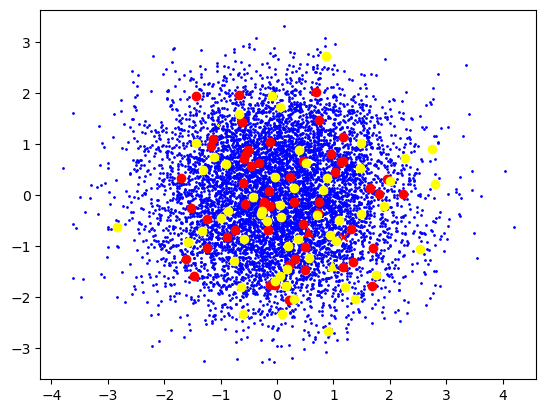

In [74]:
#visulisation de l'espace latent et de certains éléments
Bdd_train_2=autoencoder2.encoder(Bdd_train)
pca=PCA(n_components=2)
latent_pca=pca.fit_transform(Bdd_train_2[2])


phenomene=4
phenomene2=11
X1=[]
Y1=[]
X2=[]
Y2=[]
fig=plt.figure()
ims=[]

for i in range(57*phenomene,57*(phenomene+1)):
    x=latent_pca[i,0]
    y=latent_pca[i,1]
    X1.append(x)
    Y1.append(y)


for i in range(57*phenomene2,57*(phenomene2+1)):
    x=latent_pca[i,0]
    y=latent_pca[i,1]
    X2.append(x)
    Y2.append(y)


plt.scatter(latent_pca[:,1],latent_pca[:,0],color='blue',s=1)
plt.scatter(X1[:1],Y1[:1],color='red',marker='^')
plt.scatter(X1[1:-1],Y1[1:-1],color='red')
plt.scatter(X1[-1:],Y1[-1:],color='red',marker='x')
plt.scatter(X2[:1],Y2[:1],color='yellow',marker='^')
plt.scatter(X2[1:-1],Y2[1:-1],color='yellow')
im=plt.scatter(X2[-1:],Y2[-1:],color='yellow',marker='x',s=1)

In [19]:
#importation d'une bdd utilisée pour la visualisation
nom_fichier="single_pendulum"
n=10000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,indice_train):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png") 
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")

print("train fait")
  
k=0

for i in range(indice_train,Nombre_fichiers):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_test.append(np.concatenate((image1,image2),axis=1))
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")

print("test fait")     
k=0


Bdd_train=np.array(Bdd_train)
Bdd_test=np.array(Bdd_test)


train fait
test fait


In [42]:

#Fonction qui crée la double image Espace latent actualisé + Image correspondante du phénomène physique
#Il faut donner :
#Bdd Vecteur latent de l'animation considérée
#Bdd_train1 les vecteurs latents de toute la base de données train 
#Bdd_test1 les vecteurs latents de toute la base de données de test 
#long_terme=True *NOn disponible dans ce code* optionnel, pour afficher les predictions 
#stabilisation=True *NOn disponible dans ce code* optionnel, pour que les prédictions soient stabilisées ou non 

def create_images_parcours(Bdd,Bdd_train,Bdd_test,long_terme=True,stabilisation=True):
    #Créer la figure
    plt.ion
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    pca=PCA(n_components=2)
    latent_pca=pca.fit_transform(np.array(autoencoder2.encoder(np.concatenate((Bdd_train,Bdd_test,Bdd),axis=0)))[2])
    

    #axes[1].imshow(image, cmap='gray')
    Xte=[]
    Yte=[]
    X1=[]
    Y1=[]


     
    Serie=[]
    Images=[]
    bis=Bdd[0:1]
    for i in range(0,len(Bdd)):
        Latent=autoencoder2.encoder(bis)
        bis=autoencoder2.decoder(Latent[2])
        Images.append(bis[0])                   
    Images=np.array(Images)

    n=len(Bdd_test)+len(Bdd_train)
    n1=n+len(Bdd)
            

    for i in range(n):
        x=latent_pca[i,0]
        y=latent_pca[i,1]
        Xte.append(x)
        Yte.append(y)
    

    for i in range(n,n1):
        x=latent_pca[i,0]
        y=latent_pca[i,1]
        X1.append(x)
        Y1.append(y)

    axes[0].scatter(Xte,Yte,color='blue',s=1)

    image = axes[1].imshow(np.zeros((128, 256)), cmap='gray')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)

    n=len(Bdd)

    print("Creation des images\n")
    for i in range(n-1):
        axes[0].scatter(X1[i:i+1],Y1[i:i+1],color='red')
        image.set_data(Bdd[i])
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.savefig("../Images/"+str(i)+".png")



    axes[0].scatter(X1[(n-1):],Y1[(n-1):],color='red',marker='x')
    image.set_data(Bdd[n-1])
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.savefig("../Images/"+str(n-1)+".png")


    print("Creation du gif")

    
#Creation du gif a partir de l'adresse de sauvegarde de la fonction précédente (create_image_parcours_AE2)


def create_gif(file,taille):
    fig=plt.figure(figsize=(20,10))
    ims=[]
    
    for i in range(0,taille):
        Pendule=mpimg.imread(file+str(i)+".png")
        plt.axis('off')
        im=plt.imshow(Pendule,animated=True,cmap='gray')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

    ani.save('latent_pred.gif')
    plt.show()
   



Creation des images

Creation du gif


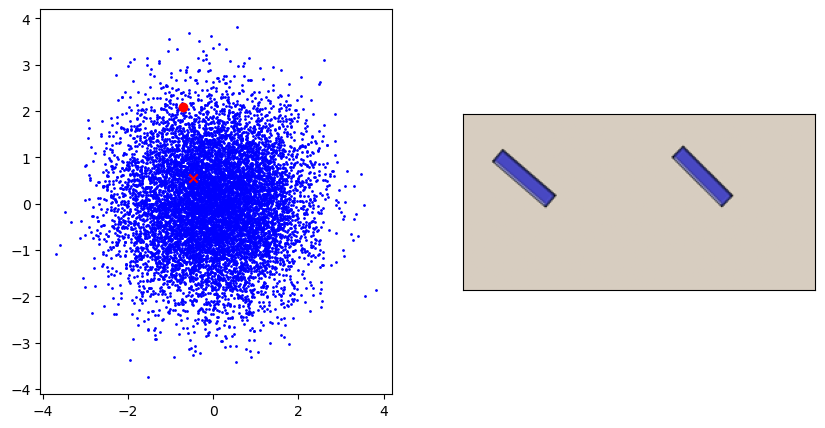

In [51]:
#Creation des images pour les animations désirées
#Phenomene donne le numero d'animation dans le fichier de bdd

phenomene=0
Test=np.array([Bdd_train[57*phenomene],Bdd_train[57*phenomene]])
create_images_parcours(Test,Bdd_train,Bdd_test,False,False)


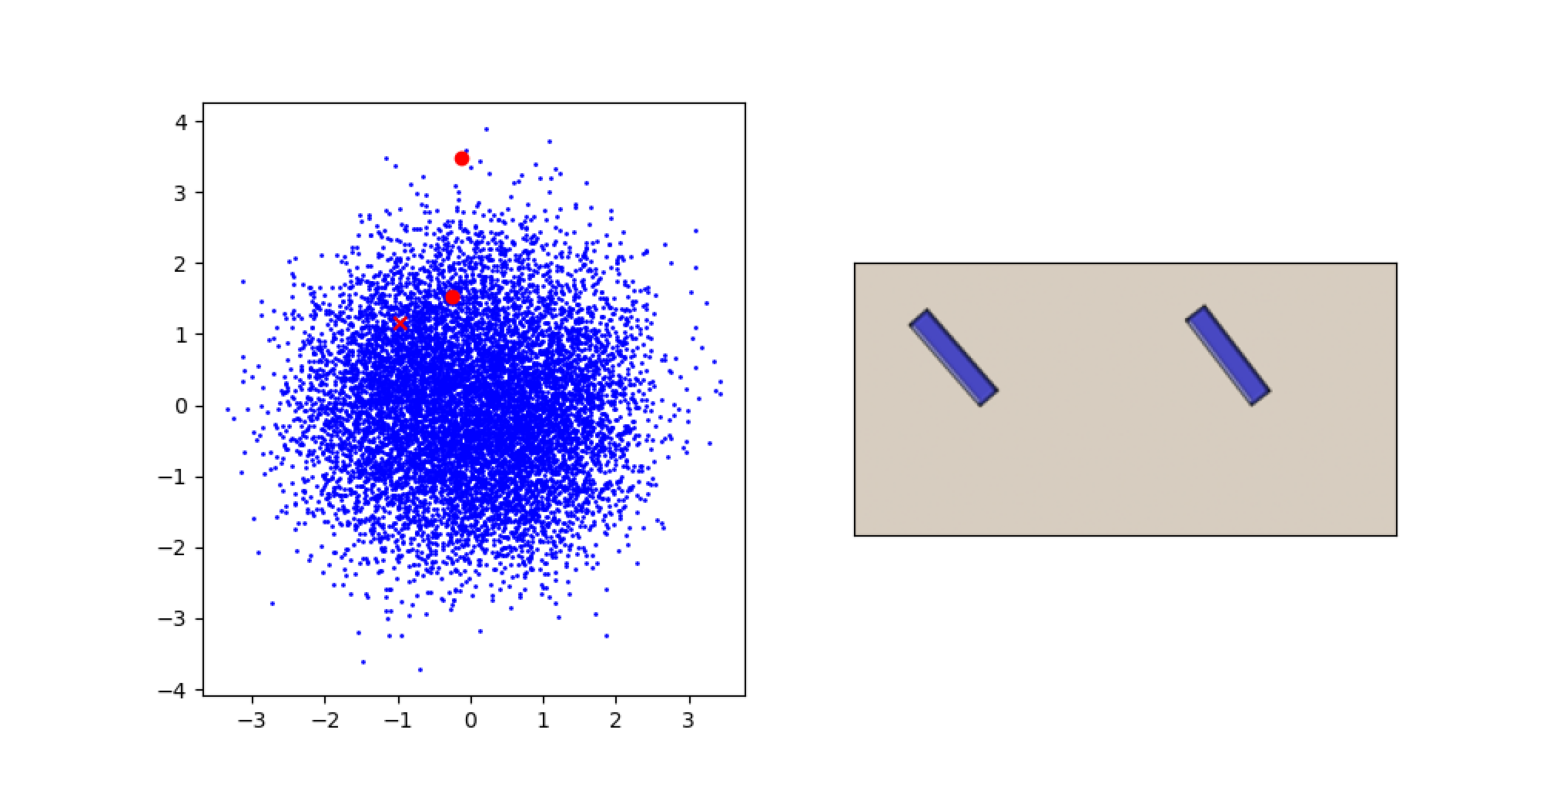

In [48]:
#Creation du gif a partir des images créées
create_gif("../Images/",len(Test))

## DEUXIEME AUTO ENCODEUR

### On rajoute le reste des images

In [ ]:
#fonction d'activaiton custom sur tensorflow (sinus)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def custom_activation(x):
  
    return (tf.math.sin(30*x))
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [ ]:
#entrainement_2=autoencoder.encoder(np.concatenate((Bdd_train,Bdd_supp))).numpy()

Bdd_train=autoencoder.encoder(Bdd_train).numpy()




2023-05-24 17:23:12.882107: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 9413591040 exceeds 10% of free system memory.
2023-05-24 17:23:23.807263: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 12551454720 exceeds 10% of free system memory.


: 

: 

In [ ]:
Bdd_test_2=autoencoder.encoder(Bdd_test).numpy()


In [ ]:
#Paramètres pour initialiser les poids


b=1/float(64)
b0=math.sqrt(6/(64))/30
b1=math.sqrt(6/(128))/30
b2=math.sqrt(6/(64))/30
b3=math.sqrt(6/(32))/30
b4=math.sqrt(6/(4))/30
#kernel_initializer=tf.keras.initializers.RandomUniform(minval=b, maxval=-b)
print(Bdd_test_2.shape)
print(Bdd_train_2.shape)

(3990, 1, 1, 64)
(15960, 1, 1, 64)


In [ ]:
#Auto encodeur 2 avec latent_dim_2 le resultat approché de LB
latent_dim_2 = 4

class Autoencoder_2(Model):
  def __init__(self, latent_dim_2):
    super(Autoencoder_2, self).__init__()
    self.latent_dim_2 = latent_dim_2
    self.encoder_2 = tf.keras.Sequential([ 
    layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(latent_dim_2,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()),
    ])
    self.decoder_2 = tf.keras.Sequential([
        layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()), 
        layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    ])
  def call(self, x):
    encoded = self.encoder_2(x)
    decoded = self.decoder_2(encoded)
    return decoded
  
  
autoencoder_2 = Autoencoder_2(latent_dim_2) 


In [ ]:

epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train_2)
batch_size=512
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0003
final_learning_rate = 0.0000015
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(Bdd_train_2,Bdd_train_2,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test_2, Bdd_test_2), callbacks=[callback,tensorboard_callback],
            )
              


2023-05-24 16:41:09.810867: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-05-24 16:41:09.810938: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-05-24 16:41:09.811679: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-05-24 16:41:09.811867: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/1000
 8/32 [======>.......................] - ETA: 0s - loss: 0.0512

2023-05-24 16:41:10.745124: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-05-24 16:41:10.745162: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-05-24 16:41:10.819392: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-05-24 16:41:10.819615: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-05-24 16:41:10.820371: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-05-24 16:41:10.821515: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-05-24 16:41:10.823549: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/train/plugins/profile/2023_05_24_16_41_10
2023-05-24 16:41:10.825165: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped too

32/32 [==============================] - 2s 25ms/step - loss: 0.0409 - val_loss: 0.0237
Epoch 2/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0203 - val_loss: 0.0159
Epoch 3/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0141 - val_loss: 0.0129
Epoch 4/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 5/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0098
Epoch 6/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0083 - val_loss: 0.0090
Epoch 7/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 8/1000
32/32 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.0079
Epoch 9/1000
32/32 [==============================] - 1s 16ms/step - loss: 0.0064 - val_loss: 0.0076
Epoch 10/1000
32/32 [==============================] - 0s 16ms/step - loss: 0.0059 - val_loss: 0.0070
Ep

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 1, 1, 128)         8320      
_________________________________________________________________
dense_159 (Dense)            (None, 1, 1, 64)          8256      
_________________________________________________________________
dense_160 (Dense)            (None, 1, 1, 32)          2080      
_________________________________________________________________
dense_161 (Dense)            (None, 1, 1, 4)           132       
Total params: 18,788
Trainable params: 18,788
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 1, 1, 32)          160       
__________________________

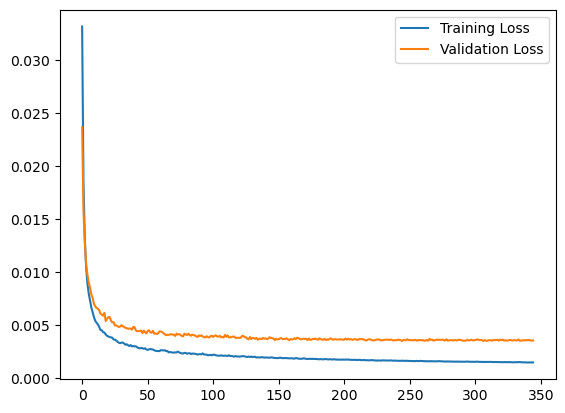

In [ ]:
encoded_imgs_2 = autoencoder_2.encoder_2(Bdd_test_2).numpy()
decoded_imgs_2 = autoencoder_2.decoder_2(encoded_imgs_2).numpy()
autoencoder_2.encoder_2.summary()
autoencoder_2.decoder_2.summary()
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

DEUXIEME VAE

In [1]:
#Construction du VAE pour le second autoencodeur avec les poids et les fonctions d'activaiton custom
latent_dim = 2

encoder_inputs = tf.keras.Input(shape=(1,1,64))
x=layers.Flatten()(encoder_inputs)
x=layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(latent_dim,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros())(x)
z_mean    = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z         = Sampling()([z_mean, z_log_var])

encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.compile()
encoder.summary()

inputs  = tf.keras.Input(shape=(latent_dim,))

x=layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros())(inputs)
x=layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros())(x)
x=layers.Dense(64,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros())(x)
outputs=layers.Reshape((1,1,64))(x)

decoder = tf.keras.Model(inputs, outputs, name="decoder")
decoder.summary()


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=2500,
    decay_rate=0.97)

# with strategy.scope():
  #  autoencoder = Autoencoder(64)
  # autoencoder = DNN()
  # autoencoder = DnnAutoencoder(64)
autoencoder_2 = VAE(encoder,decoder, [1,0.001])



 
autoencoder_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                    loss=tf.keras.losses.MeanSquaredError())

NameError: name 'tf' is not defined

In [ ]:
epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train)
batch_size=512
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0001
final_learning_rate = 0.00001
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)




optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entraine
# 
# 
# ment
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(train_data,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=val_data, callbacks=[callback],
            )
              


# IMPRESSION RESULTAT
Des gifs sont sauvegardées dans les fichiers correspondants à : ground truth, proche en proche (pep), long terme naif (ae1), long terme avec stabilisation, long terme avec hybridation
/!\ Il faut adapter le code au VAE si nécessaire /!\

In [19]:
#Phenomne correspondant au numero de la simulation 


phenomene=random.randint(0,50)
#phenomene=33
print(phenomene)

11


MovieWriter ffmpeg unavailable; using Pillow instead.


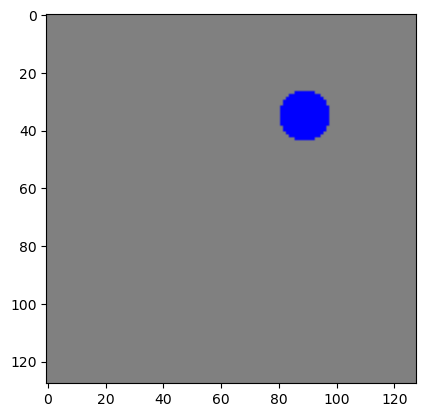

In [ ]:
#Ground Truth
fig = plt.figure()
ims = []
IMS1=[]
separate_test=np.array([np.split(Bdd_test[57*phenomene+i],2,axis=1) for i in range(0,60)])
for i in range(57):
    im = plt.imshow(separate_test[i,0], animated=True)
    ims.append([im])
    IMS1.append([separate_test[i,0]])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

ani.save('Animation/ground_truth/dynamic_images.gif')

plt.show()

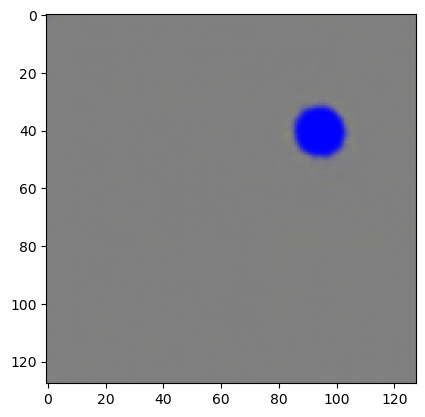

In [21]:
#Proche en proche 
fig = plt.figure()
ims2 = []
IMS_PEP=[]
itera=57
e1=autoencoder.encoder(Bdd_test[57*phenomene:57*(phenomene+1)])
decoded_finale=autoencoder.decoder(e1[0])
split=np.split(Bdd_train[57*phenomene+2*0],2,axis=1)
im=plt.imshow(split[0],animated=True)
ims2.append([im])
IMS_PEP.append([split[0]])
im=plt.imshow(split[1],animated=True)
ims2.append([im])
IMS_PEP.append([split[1]])
            
for i in range(int(57)):
    split=np.split(decoded_finale[i],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims2.append([im])
    IMS_PEP.append([split[1]])
    
ani = animation.ArtistAnimation(fig, ims2, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('../Animation/PeP/dynamic_images_mean.gif')

plt.show()

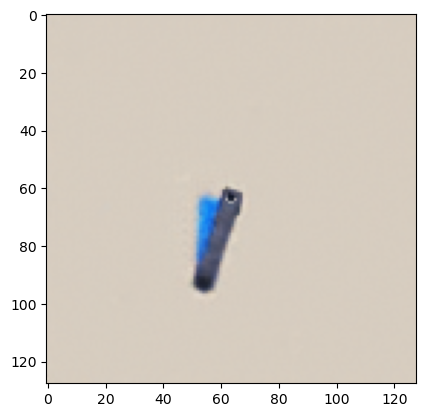

In [ ]:
#Proche en proche NSV
fig = plt.figure()
ims2 = []
IMS_PEP=[]
itera=57
e1=autoencoder.encoder(Bdd_test[57*phenomene:57*(phenomene+1)]).numpy()
oui=Normalisation_bdd(e1)
e2=autoencoder_2.encoder_2(oui).numpy()
e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
decoded_finale=autoencoder.decoder(e3)
split=np.split(Bdd_train[57*phenomene+2*0],2,axis=1)
im=plt.imshow(split[0],animated=True)
ims2.append([im])
IMS_PEP.append([split[0]])
im=plt.imshow(split[1],animated=True)
ims2.append([im])
IMS_PEP.append([split[1]])
            
for i in range(int(57)):
    split=np.split(decoded_finale[i],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims2.append([im])
    IMS_PEP.append([split[1]])

    
ani = animation.ArtistAnimation(fig, ims2, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/PeP_NSV/dynamic_images.gif')

plt.show()

In [ ]:
IMS1=np.array(IMS1)
IMS_PEP=(np.array(IMS_PEP))[0:57]
IMS_PEPNSV=np.array(IMS_PEPNSV)[0:57]



In [ ]:
Difference=IMS1-IMS_PEP
np.linalg.norm(Difference)/(57*128*128)


0.00010707324958945576

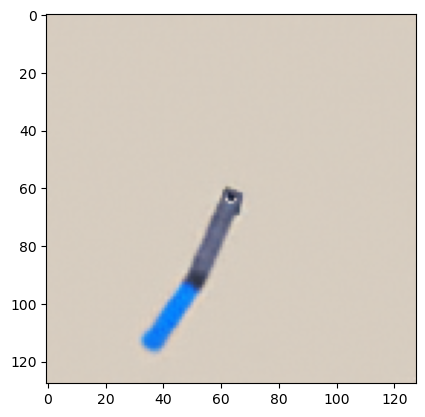

In [ ]:
#AE1 ligne 1

fig = plt.figure()
ims = []
itera=57

decoded_finale=Bdd_test[57*phenomene:57*phenomene+1]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    e1=autoencoder.encoder(decoded_finale).numpy()
    #oui=Normalisation_bdd(e1)
    #e2=autoencoder_2.encoder_2(oui).numpy()
    #e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
    decoded_finale=autoencoder.decoder(e1)
    
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/AE1/dynamic_images.gif')
    

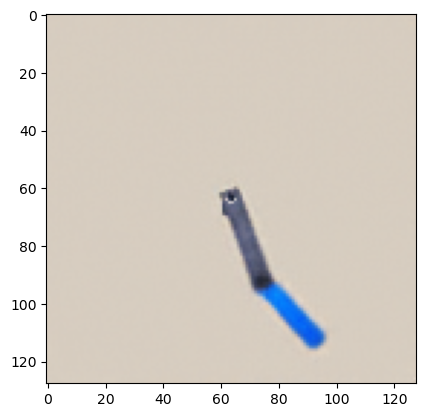

In [ ]:
#Stabilisation

fig = plt.figure()
ims = []
itera=57

decoded_finale=Bdd_test[57*phenomene:57*phenomene+2]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    e1=autoencoder.encoder(decoded_finale).numpy()
    oui=Normalisation_bdd(e1)
    e2=autoencoder_2.encoder_2(oui).numpy()
    e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
    decoded_finale=autoencoder.decoder(e3)
    
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/stabilisation/dynamic_images.gif')
    

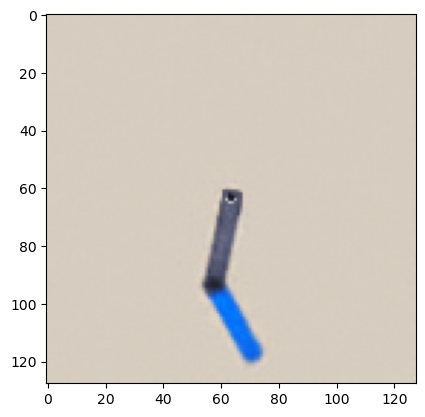

In [ ]:
#hybridation
fig = plt.figure()
ims = []
itera=57
decoded_finale=Bdd_test[57*phenomene:57*phenomene+2]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    
    if((i+1)%2==0):
        e1=autoencoder.encoder(decoded_finale).numpy()
        oui=Normalisation_bdd(e1)
        e2=autoencoder_2.encoder_2(oui).numpy()
        e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
        decoded_finale=autoencoder.decoder(e3)
    else:
        e1=autoencoder.encoder(decoded_finale).numpy()
        decoded_finale=autoencoder.decoder(e1)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/hybrid/dynamic_images.gif')
        